# Loading Package

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


from wordcloud import WordCloud
from collections import Counter


[nltk_data] Downloading package punkt to /Users/mingwang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mingwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mingwang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [66]:
human_stress = pd.read_csv('Stress.csv')
human_stress.head(5)

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


# EDA

In [67]:
# Get summary statistics 
human_stress.describe()

,label,confidence,social_timestamp
count,2838.000000,2838.000000,2.838000e+03
mean,0.524313,0.808972,1.518107e+09
std,0.499497,0.177038,1.552209e+07
min,0.000000,0.428571,1.483274e+09
25%,0.000000,0.600000,1.509698e+09
50%,1.000000,0.800000,1.517066e+09
75%,1.000000,1.000000,1.530898e+09
max,1.000000,1.000000,1.542592e+09


In [68]:
# Get summary statistics 
human_stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [69]:
# check how many categories in subreddit column
# and count the values of each Category 
human_stress['subreddit'].value_counts()

ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: subreddit, dtype: int64

In [70]:
human_stress['label'].value_counts()

1    1488
0    1350
Name: label, dtype: int64

stress and no-stress relatively even.

<AxesSubplot:xlabel='label', ylabel='count'>

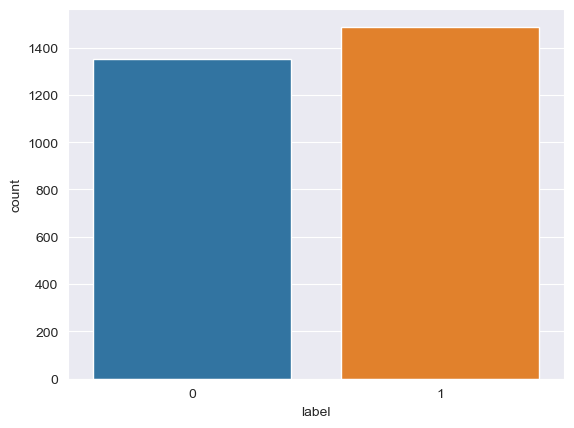

In [71]:
sns.set_style("darkgrid")
sns.countplot(data=human_stress,x= human_stress.label)

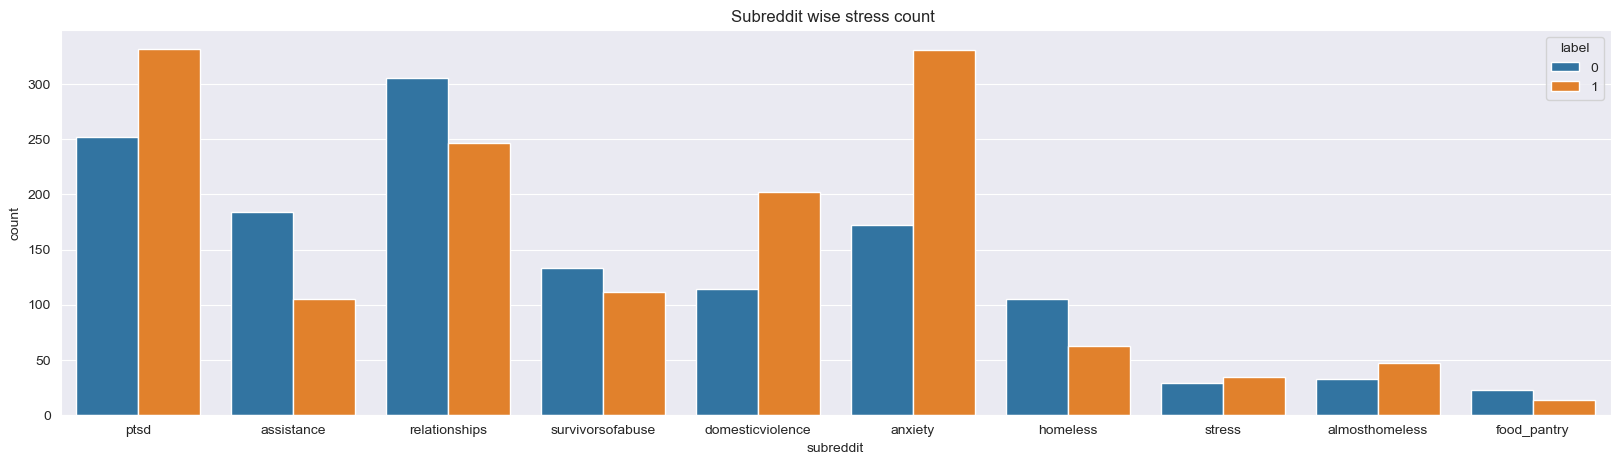

In [72]:
#visualise how the labels 0, 1 are distributed insubreddit
#reference code:

plt.figure(figsize=(20,5))
plt.title("Subreddit wise stress count ")
plt.xlabel("Subreddit")
sns.countplot(data=human_stress,x='subreddit',hue='label')
plt.show()

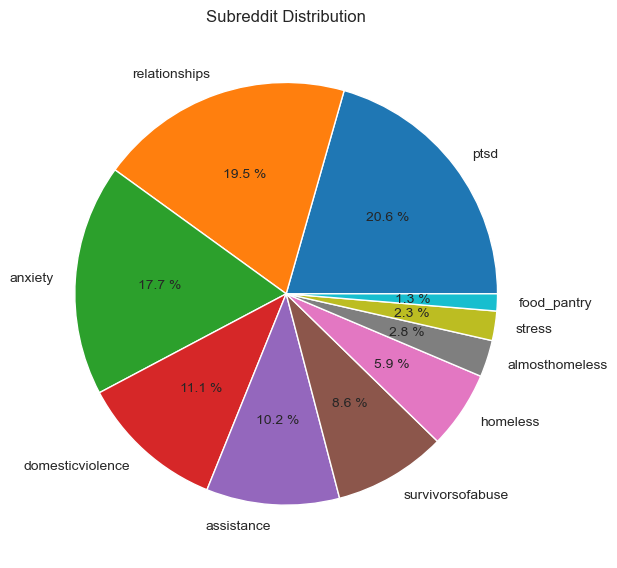

In [73]:
# subreddit Category distribution
# code reference

context=['subreddit']
plt.figure(figsize=(15,12))
for i in range(len(context)):
  plt.subplot(1,2,i+1)
  a=human_stress[context[i]].value_counts()
  title=a.index
  plt.title("Subreddit Distribution")
  plt.pie(x=a,labels=title,autopct="%.1f %%")
  plt.show()

In [74]:
remove_cols = ['subreddit','post_id','sentence_range','confidence','social_timestamp']

In [75]:
df1 = human_stress.drop(remove_cols, axis = 1)

In [76]:
df1

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0
2834,I don't have the ability to cope with it anymo...,1
2835,In case this is the first time you're reading ...,0
2836,Do you find this normal? They have a good rela...,0


# Text Preprocessing

In [77]:
def preprocess_text(text):
    # remove extraneous symbols (punctuation, special symbols)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # transform to lower case
    text = text.lower()

    # remove digits 
    text = ''.join(word for word in text if not word.isdigit())

    # tokenize the text into individual words
    tokens = word_tokenize(text)

    # remove stopwords (a, an, the etc.)
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    filtered_tokens = [token for token in tokens if not token in stop_words]

    # stem or lemmatize the filtered tokens
    lemmatizer = WordNetLemmatizer()
    processed_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # remove whitespace
    processed_tokens = [token.strip() for token in processed_tokens]

    # join the preprocessed tokens back into a string
    preprocessed_text = " ".join(processed_tokens)

    return preprocessed_text
    #return processed_tokens

In [78]:
df1['text'].head(5)

0    He said he had not felt that way before, sugge...
1    Hey there r/assistance, Not sure if this is th...
2    My mom then hit me with the newspaper and it s...
3    until i met my new boyfriend, he is amazing, h...
4    October is Domestic Violence Awareness Month a...
Name: text, dtype: object

In [79]:
df1['text'].head(5).apply(preprocess_text)

0    said not felt way suggeted go rest trigger ahe...
1    hey rassistance not sure right place post go i...
2    mom hit newspaper shocked would know dont like...
3    met new boyfriend amazing kind sweet good stud...
4    october domestic violence awareness month dome...
Name: text, dtype: object

In [80]:
df1['clean_text']= df1['text'].apply(preprocess_text)

In [81]:
df1

,text,label,clean_text
0,"He said he had not felt that way before, sugge...",1,said not felt way suggeted go rest trigger ahe...
1,"Hey there r/assistance, Not sure if this is th...",0,hey rassistance not sure right place post go i...
2,My mom then hit me with the newspaper and it s...,1,mom hit newspaper shocked would know dont like...
3,"until i met my new boyfriend, he is amazing, h...",1,met new boyfriend amazing kind sweet good stud...
4,October is Domestic Violence Awareness Month a...,1,october domestic violence awareness month dome...
...,...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0,week ago precious ignored jan happy year preci...
2834,I don't have the ability to cope with it anymo...,1,dont ability cope anymore im trying lot thing ...
2835,In case this is the first time you're reading ...,0,case first time youre reading post looking peo...
2836,Do you find this normal? They have a good rela...,0,find normal good relationship main problem see...


# Visualisation

In [82]:
# Join all the words in the DataFrame into a single string
cleaned_text = ' '.join(df1['clean_text'])

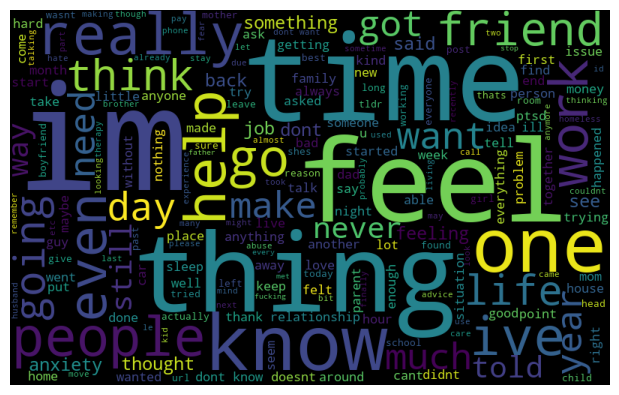

In [83]:
# Create a word cloud object
wordcloud = WordCloud(width=800, height=500).generate(cleaned_text)

# Plot the word cloud
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [84]:
#Using a function that populates bar graph from a dataframe variable (reference the CoLab exercise )

def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

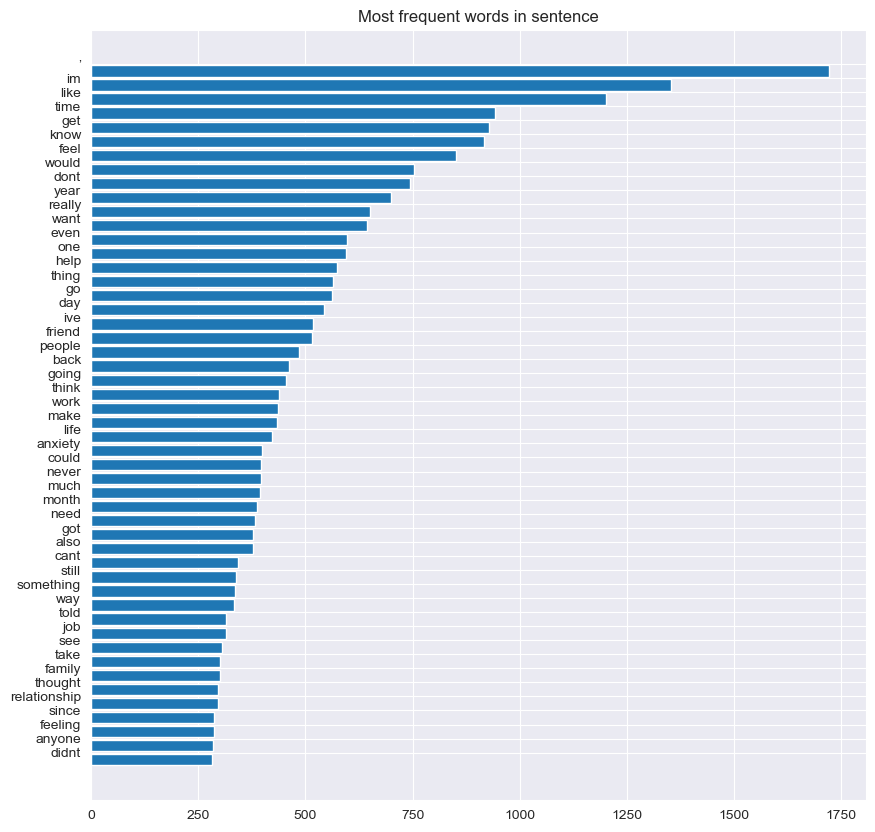

In [85]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(df1,'clean_text',"Most frequent words in sentence")

# Text Representation

### TF-IDF (Term Frequency - Inverse Document Frequency)

In [86]:
# Import the necessary libraries

import sklearn # Popular machine learning library
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf vectorizer module

In [87]:
# Import the necessary libraries
import numpy as np # Used to manipulate and perform calculations on arrays/matrices

In [88]:
# First we need to append data from all the sets to create an entire corpus

# Create an empty array
X = np.array([], dtype=str) 

In [89]:
# Append text to the empty array
X = np.append(X, df1["clean_text"]) 

In [90]:
vectorizer = TfidfVectorizer() # Load the tf-idf vectorizer from sklearn
vectorizer = vectorizer.fit(X) # Fit the vectorizer on the entire data

In [91]:
# Extract the vocabulary from the vectorizer
vocab = vectorizer.vocabulary_
print(f"Number of terms in the vocabulary = {len(vocab)}")

Number of terms in the vocabulary = 10477


This means that there are 10476 unique tokens in our data set

In [92]:
# Display a sample of the word => value mapping
print("Sample Mapping")
for idx, ele in enumerate(zip(vocab.keys(), vocab.values())):
    word, val = ele
    print(f"{word} => {val}")
    if idx == 4: break

Sample Mapping
said => 7946
not => 6145
felt => 3419
way => 10121
suggeted => 8971


In [93]:
# Transform the text for each data split and store it in a variable

X = vectorizer.transform(df1["clean_text"]).toarray()

In [94]:
# The vector representation also known as a tf-idf matrix
print(X) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [95]:
# Extract the labels for each data and store it in a variable
y = df1['label'].to_numpy()

In [96]:
# Split Train and Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Building

In [97]:
# Import the necessary libraries

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.metrics import classification_report # Module to calculate performance metrics
from sklearn.metrics import confusion_matrix # Module to calculate the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # Module to display the confusion matrix

import matplotlib.pyplot as plt # Module to help draw the confusion matrix

## Logistic Regression

In [98]:
# Load the model
lr_model = LogisticRegression()

In [99]:
# Fit the model
lr_model.fit(X=X_train, y=y_train)

LogisticRegression()

In [100]:
# Obtain the predictions for the test data
pred_lr = lr_model.predict(X_test)

In [101]:
# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
results = classification_report(y_true=y_test, y_pred=pred_lr, output_dict=True, zero_division=0) 
# Use zero_devision to control warnings

In [102]:
print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

Accuracy = 73.77 %
Weighted Avg F1-score = 0.7380


### Confusion Matrix

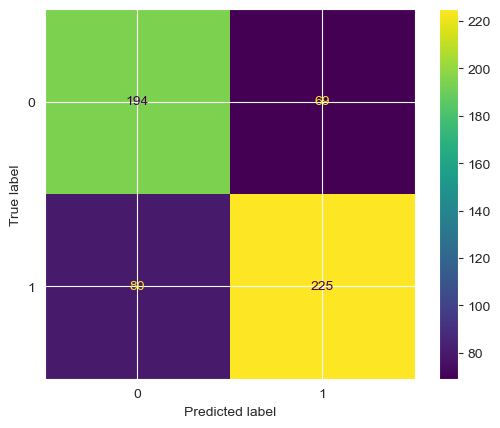

In [103]:
# Obtain the confusion matrix
cm = confusion_matrix(y_test, pred_lr)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

## Decision Tree

In [104]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier # Decision Tree Model for Classification

In [105]:
# Load the model
dt_model = DecisionTreeClassifier()

In [106]:
# Fit the model
dt_model.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

In [107]:
# Obtain the predictions for the validation data
pred_dt = dt_model.predict(X_test)

In [108]:
# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
results = classification_report(y_true=y_test, y_pred=pred_dt, output_dict=True, zero_division=0) # Use zero_devision to control warnings

In [109]:
print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

Accuracy = 59.86 %
Weighted Avg F1-score = 0.5991


### Confusion Matrix

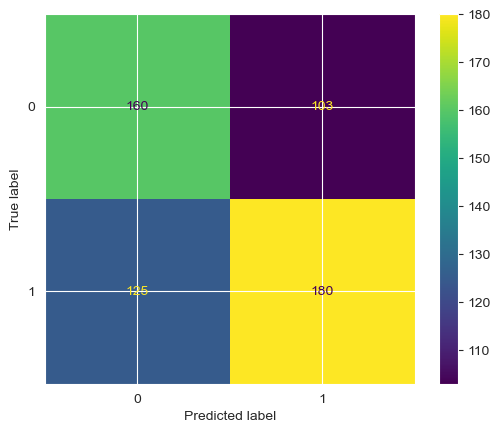

In [110]:
# Obtain the confusion matrix
cm = confusion_matrix(y_test, pred_dt)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

# Support Vector Machine (SVM)

In [111]:
# Import the necessary libraries
from sklearn.svm import SVC # Support Vector Machine for Classification

In [112]:
# Load the model
svc_model = SVC()

In [113]:
# Fit the model
svc_model.fit(X=X_train, y=y_train)

SVC()

In [114]:
# Obtain the predictions for the validation data
pred_svm = svc_model.predict(X_test)

In [115]:
# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
results = classification_report(y_true=y_test, y_pred=pred_svm, output_dict=True, zero_division=0) # Use zero_devision to control warnings

In [116]:
print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

Accuracy = 73.59 %
Weighted Avg F1-score = 0.7363


### Confusion Matrix

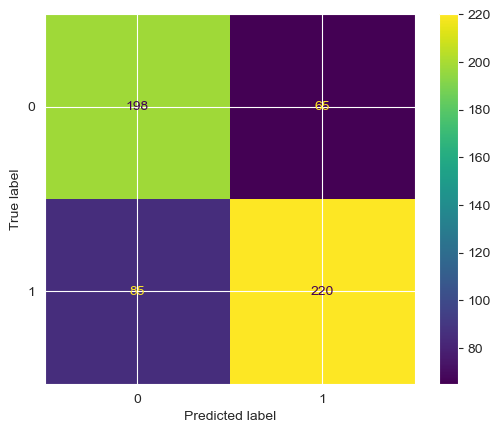

In [117]:
# Obtain the confusion matrix
cm = confusion_matrix(y_test, pred_svm)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

Among these 3 models, Logistic and SVM models seem have higher accuracy than the decision tree. And they have same accuracy and F1-score

This means that out of all the predictions made on the test data, 73.94% were correct.

F1-score takes into account both precision and recall and is a good overall metric for assessing the performance of a classification model. The weighted average F1-score of the logistic regression model and SVM both is 0.7398, which is a good score considering the range of 0 to 1.


# Apply these models to some random text

## Logistic Regression

In [118]:
def predictor(text):
    processed = preprocess_text(text)
    embedded_words = vectorizer.transform([text])
    res = lr_model.predict(embedded_words)
    if res[0] == 1:
        res = "this person is in stress"
    else:
        res = "this person is not in stress"
    return res

In [119]:
text1 = """This is the worst thing that happened to me today. I got less marks in my exam, 
            so it is not going to help me in my future."""
text2 = """Hi Shashank sir, I gained a lot of knowledge from you for my future use. 
            This was a very fun journey for me. Thanks for boosting my confidence."""

In [120]:
print(predictor(text1))
print(predictor(text2))

this person is in stress
this person is not in stress


In [121]:
text3 = 'I am not happy now'
text4 = 'I am not sad at all'

In [122]:
print(predictor(text3))
print(predictor(text4))

this person is not in stress
this person is in stress


## SVM

In [123]:
def predictor_svm(text):
    processed = preprocess_text(text)
    embedded_words = vectorizer.transform([text]).toarray() # Convert to dense format
    res = svc_model.predict(embedded_words)
    if res[0] == 1:
        res = "this person is in stress"
    else:
        res = "this person is not in stress"
    return res

In [124]:
print(predictor_svm(text1))
print(predictor_svm(text2))

this person is in stress
this person is not in stress


In [125]:
text3 = 'I am not happy now'

In [126]:
print(predictor_svm(text3))

this person is not in stress


In [127]:
text4 = 'I am not that sad'

In [128]:
print(predictor_svm(text4))

this person is in stress
